# Теоритическая часть

### 1. Посчитайте производную функции tanh(z) и выразите ее через саму функцию tanh(z)

$$tanh'(z) = \frac{\partial}{\partial z}(\frac{e^z + e^{-z}}{e^z - e^{-z}}) = \frac{(e^z + e^{-z})*(e^z + e^{-z}) - (e^z - e^{-z})*(e^z - e^{-z})}{(e^z + e^{-z})^2} = \frac{(e^z + e^{-z})^2 - (e^z - e^{-z})^2}{(e^z + e^{-z})^2} = 1 - tanh^2(z)$$

Преобразуем $tanh(z)$ так, чтобы для вычисления использовалась только одна операция экспонирования.

$$tanh(z) = \frac{e^z + e^{-z}}{e^z - e^{-z}} = 1 - \frac{2 e^{-z}}{e^z + e^{-z}} = 1 - \frac{2}{e^{2z} + 1}$$

Т.к. $tanh'(z)$ выражается через $tanh(z)$, то её также можно вычислять с одной операцией экспонирования.

### 2. Воспользовавшись обозначениями, введенными выше, выпишите формулы прямого прохода (forward pass) и вычисления оценочной функции кросс-энтропия

Запишем сначала формулу для прямого прохода.
1. Дописываем в вектор единицу.
2. Умножаем на матрицу весов.
3. Применяем активацию(если не последний слой).
4. Повторяем
$$\hat{y} = softmax(tanh([1, ...tanh([1, tanh([1, x]W_1)]W_2)...]W_{L-1})*W_L)$$
$$ce(W_1, . . . , W_L, x, y) = -\sum_{j=0}^{K} y_j*log(\hat{y}_j)$$

### 3. Выпишите формулы прямого прохода и вычисления оценочной функции для батча

$$CE(W_1, . . . , W_L, x_{1}, . . . , x_{N}, y_{1}, . . . , y_{N})$$


Введем обозначение $itr(X)$, которое говорит, что к матрице $X$ слева нужно приписать столбец единиц.<br>
Теперь запишем формулу для прямого прохода (страшно, но как есть).
1. Дописываем в матрицу батча столбец единиц.
2. Умножаем на матрицу весов.
3. Применяем активацию(если не последний слой).
4. Повторяем
$$\hat{y} = softmax(itr(tanh(itr(...tanh(itr(tanh(itr(X)*W_1))*W_2))*W_{L-1})) * W_{L})$$
<br>
И запишем формулу кросс-энтропии для батча.<br>
$$CE(W_1, . . . , W_L, x_{1}, . . . , x_{N}, y_{1}, . . . , y_{N}) = -\sum_{i=1}^{N}\sum_{j=1}^{K}y^{(i)}_{j} * log(\hat{y}^{(i)}_{j})$$

### 4. Покажите, что softmax(z + c) = softmax(z)

$$
softmax(z + c) = 
\{\frac{e^{z_1 + c}}{\sum_{i=1}^K e^{z_i + c}}, ..., \frac{e^{z_K + c}}{\sum_{i=1}^K e^{z_i + c}}\} = 
\{\frac{e^c  e^{z_1}}{e^c\sum_{i=1}^K e^{z_i}}, ..., \frac{e^c e^{z_K}}{e^c\sum_{i=1}^K e^{z_i}}\} = 
\{\frac{e^{z_1}}{\sum_{i=1}^K e^{z_i}}, ..., \frac{e^{z_K}}{\sum_{i=1}^K e^{z_i}}\} = 
softmax(z)
$$

Т.к. мы не применяем никакую активцию к последнему слою, то значения выходного вектора могут быть в пределах $(-inf, +inf)$ <br>
Но большие положительные значения $z_i$, при экспонировании могут приводить к переполнению и выдавать $inf$. <br>
Поэтому мы можем вычесть $max_j(z_j)$ из всех компонент вектора $z$. Теперь все компоненты вектора в пределах $\left(-inf, 0\right]$ <br>
Эти значения уже будут корректно экспонироваться в numpy и проблем не возникнет.

### 5. Посчитайте, сколько всего параметров содержится в полносвязной нейронной сети с L−1 скрытым слоем, если входные вектора имеют размерность M, выходные вектора — K, а в каждом скрытом слое — H нейронов.

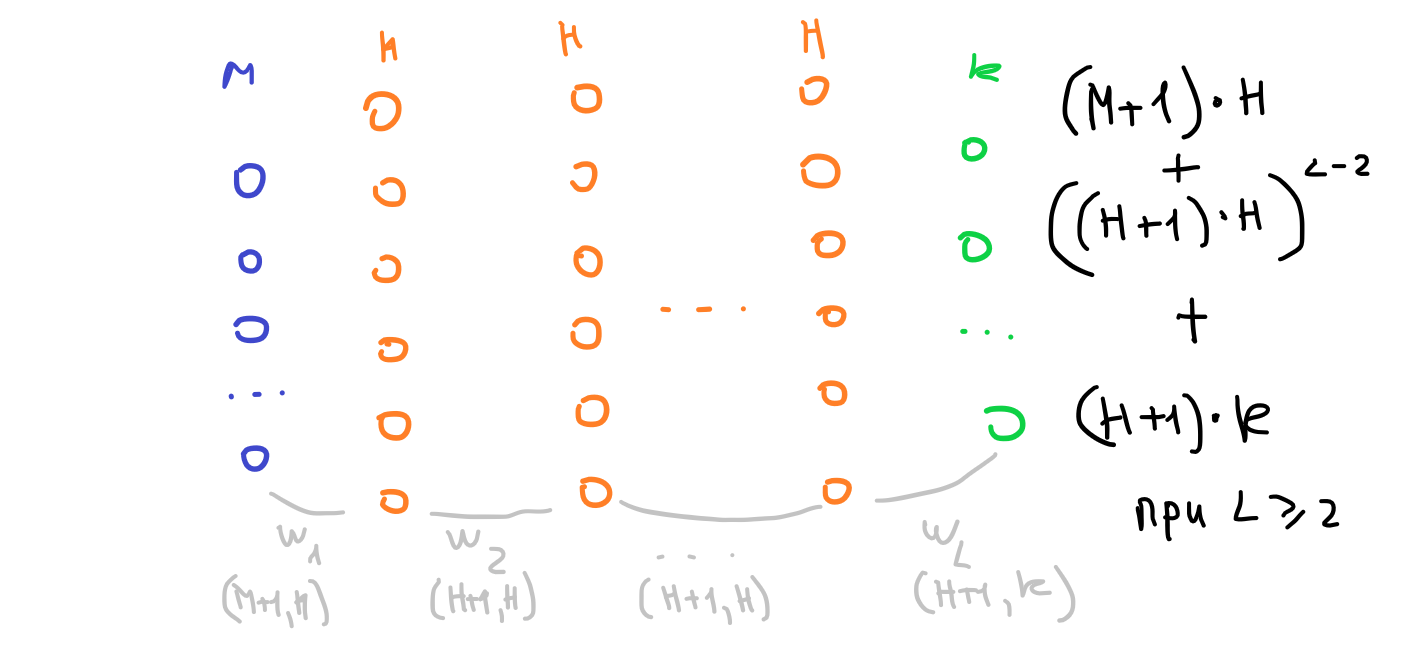

Получаем $(M + 1) * H + (H+1) * H*(L-2) + (H+1) * K$

### 6. Для случая одного входного примера выведите формулу для $δ^{(L)}$ — градиента оценочной функции по предактивациям в последнем слое $z^{(L)}$


Запишем выходы нейронной сети через $z^{(L)}$

$$\hat{y} = softmax(z^{(L)})$$

<br>
И оценочную функцию.

$$L(\hat{y}, y) = -\sum_{i=1}^{K}y_i log(\hat{y}_i)$$

Теперь запишем производную по одной компоненте предактивации.

$$\frac{\partial L}{\partial z^{(L)}_j} = 
-\sum_{i=1}^{K}y_i\frac{1}{\hat{y}_i}\frac{\partial \hat{y}_i}{\partial z^{(L)}_j}$$
<br>
Давайте сначала посчитаем производную $softmax(z)_i = \hat{y}_i$ по $z^{(L)}_j$
#### 1. $i = j$


$$\left(\frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}\right)'_{z_i} 
= \frac{e^{z_i} \sum_{j=1}^{K} e^{z_j} - e^{z_i}e^{z_i}}{(\sum_{j=1}^{K} e^{z_j})^2} 
= \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}} - \left(\frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}\right)^2 
= \hat{y}_i(1 - \hat{y}_i)$$

#### 2. $i \ne j$

$$\left(\frac{e^{z_i}}{\sum_{t=1}^K e^{z_t}}\right)'_{z_j} 
= \frac{0 \sum_{t=1}^{K} e^{z_t} - e^{z_i}e^{z_j}}{(\sum_{t=1}^{K} e^{z_t})^2} 
= -\frac{e^{z_i}e^{z_j}}{\left(\sum_{j=1}^K e^{z_j}\right)^2} 
= -\hat{y}_i \hat{y}_j$$

И теперь можем посчитать искомую производную
$$\frac{\partial L}{\partial z^{(L)}_j} 
= -\sum_{i=1}^{K}y_i\frac{1}{\hat{y}_i}\frac{\partial \hat{y}_i}{\partial z^{(L)}_j}
= -\sum_{i \ne j}\left(y_i * \frac{1}{\hat{y}_i} * (-\hat{y}_i\hat{y}_j)\right) - y_j * \frac{1}{\hat{y}_j} * \hat{y}_j * (1 - \hat{y}_j)
= -y_j(1 - \hat{y}_j) + \sum_{i \ne j}y_i\hat{y}_j
= -y_j + y_j\hat{y}_j + \sum_{i \ne j}y_i\hat{y}_j
$$
$$
= -y_j + \hat{y}_j\sum_{i=1}^{K}y_i 
= \hat{y}_j - y_j
$$


Тогда для всего вектора формула будет следующая:

$$\frac{\partial L}{\partial z^{(L)}} = \hat{y} - y $$

### 7. Для случая одного входного примера выведите формулу для подсчета $δ^{(l)}$ — градиента оценочной функции по $z^{(l)}$ — через $δ^{(l+1)}$.

$$δ^{(l)} = \frac{\partial L}{\partial z^{(l)}} 
= \frac{\partial L}{\partial z^{(l+1)}} \frac{\partial z^{(l+1)}}{\partial z^{(l)}}
= δ^{(l + 1)} * \frac{\partial z^{(l+1)}}{\partial z^{(l)}}
$$

Теперь нужно посчитать $\frac{\partial z^{(l+1)}}{\partial z^{(l)}}$. Пусть $g$ -функция активации после слоя $l$
$$z^{(l+1)} = [1; g(z^{(l)})] * W^{(l+1)}$$ 
<br>
Пусть строки нашей матрицы весов нумеруются с 0, а столбцы как обычно с 1.
$$z^{(l+1)}_i = W^{(l+1)}_{0i} + g(z^{(l)}_1)W^{(l+1)}_{1i} + g(z^{(l)}_2)W^{(l+1)}_{2i} + ...$$


$$\frac{\partial z^{(l+1)}_i}{\partial z^{(l)}_j}
= W^{(l+1)}_{ji} g'(z^{(l)}_j)
$$

$$\frac{\partial z^{(l+1)}}{\partial z^{(l)}_j}
= W^{(l+1)}_{j} g'(z^{(l)}_j)
$$

$$\frac{\partial z^{(l+1)}}{\partial z^{(l)}}
= W^{(l+1)T} g'(z^{(l)})
$$
И т.к. матрица W у нас содержит первую строчку весов для смещений(которая очень мешается), то мы приходим к формуле вида: <br>
$$\frac{\partial z^{(l+1)}}{\partial z^{(l)}}
= W^{(l+1)T}_{[1:,:]} g'(z^{(l)})
$$

И тогда итоговая формула с учетом всех размерностей выглядит следующим образом.

$$δ^{(l)} =δ^{(l+1)}W^{(l+1)T}_{[1:,:]}  \cdot g'(z^{(l)})$$

### 8. Для случая одного входного примера выведите формулу для $∇_{W^{(l)}} ce$ — градиента оценочной функции по весам $W^{(l)}$ , используя $δ^{(l)}$.

Обозначим функцию потерь за $L$. <br>

$$\frac{\partial L}{\partial W^{(l)}_{ji}} 
= \frac{\partial L}{\partial z^{(l)}_i} \frac{\partial z^{(l)}_i}{\partial W^{(l)}_{ji}}
$$

$$z^{(l)}_i = W^{(l)}_{0i} + a^{(l-1)}_1W^{(l)}_{1i} + a^{(l-1)}_2W^{(l)}_{2i} + ...$$
<br>
$$\frac{\partial z^{(l)}_i}{\partial W^{(l)}_{ji}} = a^{(l-1)}_j$$

Тогда получаем следующее выражение для $\frac{\partial L}{\partial W^{(l)}_{ji}}$

$$\frac{\partial L}{\partial W^{(l)}_{ji}}
= δ^{(l)}_i a^{(l-1)}_j
$$
<br>
$$\frac{\partial L}{\partial W^{(l)T}}
= δ^{(l)T}a^{(l-1)}
$$
$$\frac{\partial L}{\partial W^{(l)}}
=  a^{(l-1)T}δ^{(l)}
$$

### 9. По аналогии с предыдущим пунктом, для батча примеров выведите формулу для $DW[l] =∇_{W^{(l)}}CE$ через $DZ[l] = ∇_{Z^{(l)}}CE$.

Обозначим функцию потерь за $L$. И пусть в батче $m$ примеров <br>
$$ DW[l]
= \frac{\partial L}{\partial W^{(l)}} 
= \frac{\partial L}{\partial Z^{(l)}} \frac{\partial Z^{(l)}}{\partial W^{(l)}}
= \frac{1}{m}DZ[l] \frac{\partial Z^{(l)}}{\partial W^{(l)}}
$$

$$Z^{(l)} = [\mathbf{1}, A^{(l-1)}]W^{(l)}$$
<br>
$$Z^{(l)}_i = W^{(l)}_{01} + A^{(l-1)}_{i1} W^{(l)}_{1i} + A^{(l-1)}_{i2} W^{(l)}_{2i} + ...$$
<br>
$$\frac{\partial Z^{(l)}_i}{\partial W^{(l)}_{ji}} = A^{(l-1)}_{ij} \Rightarrow \frac{\partial Z^{(l)}}{\partial W^{(l)}} = A^{(l-1)T}$$
<br>
Тогда итоговая формула для $DW[l]$ : 
<br>
$$DW[l] = A^{(l-1)T}DZ[l] $$

### 10. Выпишите все формулы обратного прохода для батча в векторизованном виде $DW[l] = ∇_{W^{(l)}}CE$ через матрицы $X, \hat{Y}, Y , A^{(l)}, Z[l]$.  

Пусть в $i$-ом слое нейронной сети $H_i$ нейронов. 
Будем записывать размер получившейся матрицы после выражения.

$1$. $DZ[L] = \frac{1}{m}\hat{Y} - Y$<br> размеры матриц - $(m, H_L) = (m, H_L) - (m, H_L)$
<br>
<br>
$2$. $DW[L] = A^{(L-1)T} DZ[L] $
<br>
размеры матриц - $(H_{L-1}, H_{L}) = (H_{L-1}, m) * (m, H_L)$
<br>
$Db[L] = np.sum(DZ[L], axis=0, keep\_dims=True) $
<br>
Строку $Db[L]$ нужно "приклеить" сверху к уже посчитаному $DW[L]$
<br>

...
<br>
$k$. $DZ[l] = DZ^{(l+1)}W^{(l+1)T}_{[1:,:]} \cdot g'(Z^{(l)}) = DA^{(l+1)}\cdot g'(Z^{(l)})$
<br>
размеры матриц - $(m, H_l) = (m, H_{l+1})* (H_{l+1}, H_{l}) \cdot (m, H_{l})$
<br>
<br>
$k+1$. $DW[l] = A^{(l-1)T} DZ[l] $
<br>
размеры матриц - $(H_{l-1}, H_l) = (H_{l-1}, m)* (m, H_{l}) \cdot (m, H_{l})$
<br>
$Db[l] = np.sum(DZ[l], axis=0, keep\_dims=True) $
<br>
Строку $Db[l]$ нужно "приклеить" сверху к уже посчитаному $DW[l]$
<br>
<br>
$L$. $DZ[1] = DZ^{(2)}W^{(2)T}_{[1:,:]} \cdot g'(Z^{(1)}) = DA^{(2)}\cdot g'(Z^{(l)})$
<br>
размеры матриц - $(m, H_1) = (m, H_{2})* (H_{2}, H_{1}) \cdot (m, H_{1})$
<br>
<br>
$L+1$. $DW[1] =  X^{T} DZ[1] $
<br>
размеры матриц - $(H_0, H_1) = (H_{0}, m)* (m, H_{1}) \cdot (m, H_{1})$, где $X:(m, H_0)$
<br>
$Db[1] = np.sum(DZ[1], axis=0, keep\_dims=True) $
<br>
Строку $Db[1]$ нужно "приклеить" сверху к уже посчитаному $DW[l]$
<br>
<br>

# Практическая часть

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from collections import defaultdict
import random
from tqdm import tqdm
from IPython.display import display
from sklearn.decomposition import PCA
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import re
import string

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (30,15)

### A. Загрузите и распакуйте матрицы эмбеддингов GloVe

In [2]:
%%time
word2emb = dict()
with open("glove.6B/glove.6B.50d.txt", "r", encoding='utf-8') as inp:
    for line in inp:
        spl = line.strip().split()
        word2emb[spl[0]] =  np.array(spl[1:], dtype=np.float32)

Wall time: 6.47 s


### Вопрос A.1: Покажите, что косинус угла между векторами совпадает с их скалярным произведением, если вектора предварительно нормировать

Покажем, как это получается теоретически.
$$(\vec{a}, \vec{b}) = |\vec{a}||\vec{b}|*cos(\angle (\vec{a}, \vec{b}))$$
<br>
Т.к. вектора нормированы, то их длина равна 1, и значит
$$(\vec{a}, \vec{b}) = cos(\angle (\vec{a}, \vec{b}))$$

Выведем формулу для $\rho(\mathbf{a}, \mathbf{b})$ - евклидового расстояния между векторами $\mathbf{a}$ и $\mathbf{b}$ через косинус угла между ними. 

$$\rho(\vec{a}, \vec{b}) 
= |\vec{b} - \vec{a}| 
= |\vec{a}|^2 + |\vec{b}|^2 - 2|\vec{a}||\vec{b}|cos(\angle (\vec{a}, \vec{b}))$$
<br>
$$= 1 + 1 - 2 * 1 * 1 * cos(\angle (\vec{a}, \vec{b})) = 2(1 - cos(\angle (\vec{a}, \vec{b}))) = 2(1 - (\vec{a}, \vec{b}))
$$

### Вопрос A.2: Выберите 10 слов, начинающихся с первых двух букв вашей фамилии в латинской транскрипции. Для выбранных вами слов найдите 15 ближайших слов.

In [3]:
words_ln = [word for word in word2emb.keys() if word.startswith("os")]
words_ln = np.random.choice(words_ln, 10)
print(words_ln)

['osteoarthritis' 'osbaldeston' 'osteria' 'oshiomole' 'ostp' 'osleidys'
 'ostraca' 'osio' 'osuga' 'oser']


In [4]:
N = 15
frames = []
for w in tqdm(words_ln):
    nearest_dot = []
    nearest_cosine = []
    for other_w in word2emb.keys():
        nearest_dot.append((np.dot(word2emb[w], word2emb[other_w]), other_w))
        nearest_dot = sorted(nearest_dot, key=lambda x: x[0], reverse=True)[:N]
        nearest_cosine.append((distance.cosine(word2emb[w], word2emb[other_w]), other_w))
        nearest_cosine = sorted(nearest_cosine, key=lambda x: x[0])[:N]
    d = {"nearest_dot": nearest_dot, "nearest_cosine": nearest_cosine}
    df = pd.DataFrame(data=d)
    frames.append(df.T)
pd.concat(frames, keys=words_ln)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:43<00:00, 16.33s/it]


0  \
osteoarthritis nearest_dot     (28.370049, non-mandatory)   
               nearest_cosine       (0.0, osteoarthritis)   
osbaldeston    nearest_dot            (12.85012, nanceen)   
               nearest_cosine          (0.0, osbaldeston)   
osteria        nearest_dot           (24.225664, osteria)   
               nearest_cosine              (0.0, osteria)   
oshiomole      nearest_dot         (23.086882, oshiomole)   
               nearest_cosine            (0.0, oshiomole)   
ostp           nearest_dot           (22.058872, shimoff)   
               nearest_cosine                 (0.0, ostp)   
osleidys       nearest_dot           (48.86434, osleidys)   
               nearest_cosine             (0.0, osleidys)   
ostraca        nearest_dot             (19.369385, 25-64)   
               nearest_cosine              (0.0, ostraca)   
osio           nearest_dot            (15.710159, wivina)   
               nearest_cosine                 (0.0, osio)   
osuga          nearest_dot             (30.938263, osuga)   
               nearest_cosine                (0.0, osuga)   
oser           nearest_dot          (13.978855, juleanna)   
               nearest_cosine                 (0.0, oser)   

                                                              1  \
osteoarthritis nearest_dot          (27.938221, osteoarthritis)   
               nearest_cosine  (0.13825088739395142, arthritis)   
osbaldeston    nearest_dot                  (12.4003315, ajaye)   
               nearest_cosine   (0.15879780054092407, pretyman)   
osteria        nearest_dot                (21.732311, hiroichi)   
               nearest_cosine      (0.17484265565872192, circo)   
oshiomole      nearest_dot                    (22.065735, kloo)   
               nearest_cosine    (0.35529619455337524, holecek)   
ostp           nearest_dot                   (21.648624, afptv)   
               nearest_cosine       (0.24287039041519165, catc)   
osleidys       nearest_dot               (32.12744, 6204/64033)   
               nearest_cosine    (0.3309045433998108, palimony)   
ostraca        nearest_dot                     (18.412891, yit)   
               nearest_cosine  (0.2508015036582947, phosphatic)   
osio           nearest_dot                 (14.734339, charima)   
               nearest_cosine      (0.18561410903930664, riska)   
osuga          nearest_dot                (25.32719, tomoyoshi)   
               nearest_cosine     (0.16604721546173096, sayuri)   
oser           nearest_dot                  (13.435892, holson)   
               nearest_cosine       (0.1733834147453308, seipp)   

                                                               2  \
osteoarthritis nearest_dot               (27.526377, rheumatoid)   
               nearest_cosine  (0.15998172760009766, rheumatoid)   
osbaldeston    nearest_dot                 (12.263025, chaanine)   
               nearest_cosine   (0.17545545101165771, challenor)   
osteria        nearest_dot             (21.010893, sperimentale)   
               nearest_cosine        (0.2226749062538147, mozza)   
oshiomole      nearest_dot                     (21.178444, puhs)   
               nearest_cosine      (0.3723149299621582, breunig)   
ostp           nearest_dot                    (20.813288, hieng)   
               nearest_cosine         (0.2597690224647522, ohim)   
osleidys       nearest_dot                 (31.465664, bershawn)   
               nearest_cosine       (0.37185508012771606, mirta)   
ostraca        nearest_dot                  (17.011547, ostraca)   
               nearest_cosine   (0.26523637771606445, redacting)   
osio           nearest_dot                  (14.73183, chitauro)   
               nearest_cosine    (0.19851833581924438, spagnoli)   
osuga          nearest_dot                   (24.285677, sayuri)   
               nearest_cosine   (0.25191032886505127, tomoyoshi)   
oser           nearest_dot                     (13.280407, byrs)   
      

### Вопрос A.3: Найдите 50 пар максимально близких друг к другу слов

In [339]:
emb_matr = np.stack(list(word2emb.values()))
emb_matr_t = emb_matr.T
N = 50

In [340]:
most_similar_dot = []
all_closest = []
batch_size = 500
words_nearest_idx = None
words_nearest_val = None
for i in tqdm(range(0, emb_matr.shape[0], batch_size)):
    cur_batch = emb_matr[i : i + batch_size]
    batch_distances = cur_batch @ emb_matr_t
    mins = np.argpartition(batch_distances, kth=-(N + 1), axis=1)[:,-(N + 1):]
    if words_nearest_idx is None:
        words_nearest_idx = mins
        words_nearest_val = np.take_along_axis(batch_distances, mins, axis=1)
    else:
        words_nearest_idx = np.concatenate((words_nearest_idx, mins), axis=0)
        words_nearest_val = np.concatenate((words_nearest_val, np.take_along_axis(batch_distances, mins, axis=1)), axis=0)
        
flat_idx = np.argpartition(words_nearest_val.ravel(), -(N + emb_matr.shape[0]))[-(N + emb_matr.shape[0]):]
row_idx, col_idx = np.unravel_index(flat_idx, words_nearest_val.shape)
mins = words_nearest_val[row_idx, col_idx]
mins_order = np.argsort(mins)
row_idx, col_idx = row_idx[mins_order], col_idx[mins_order]
all_words = list(word2emb.keys())

been = set()
cnt = 0
data = {'word1':[], 'word2':[], 'dot_product':[]}
for i, j in zip(row_idx[::-1], col_idx[::-1]):
    ind1, ind2 = i, words_nearest_idx[i, j]
    if ind1 != ind2 and not (ind2, ind1) in been:
        cnt += 1 
        w1, w2 = all_words[i], all_words[words_nearest_idx[i, j]]
        been.add((ind1, ind2))
        data['word1'].append(w1)
        data['word2'].append(w2)
        data['dot_product'].append(np.dot(word2emb[w1], word2emb[w2]))
    if cnt == 50:
        break
df = pd.DataFrame(data=data)
df

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [28:42<00:00,  2.15s/it]


,word1,word2,dot_product
0,www.star,telegram.com,115.828201
1,paleographically,palaeographically,103.579437
2,1910-45,1910-1945,87.245346
3,202-383-7824,212-556-4204,87.006241
4,#b,#e,86.877106
5,passeriformes,charadriiformes,86.610374
6,condita,urbe,86.178711
7,tburr,tburrglobe.com,85.459145
8,background-color,#e,84.998055
9,yahn,sih,84.796036


In [341]:
emb_matr_norm = (emb_matr / np.linalg.norm(emb_matr, ord=2, axis=1, keepdims=True))
emb_matr_norm_t = emb_matr_norm.T
N = 50

In [342]:
most_similar_dot = []
all_closest = []
batch_size = 500
words_nearest_idx = None
words_nearest_val = None
for i in tqdm(range(0, emb_matr.shape[0], batch_size)):
    cur_batch = emb_matr_norm[i : i + batch_size]
    batch_distances = cur_batch @ emb_matr_norm_t
    mins = np.argpartition(batch_distances, kth=-(N + batch_size), axis=1)[:,-(N + batch_size):]
    if words_nearest_idx is None:
        words_nearest_idx = mins
        words_nearest_val = np.take_along_axis(batch_distances, mins, axis=1)
    else:
        words_nearest_idx = np.concatenate((words_nearest_idx, mins), axis=0)
        words_nearest_val = np.concatenate((words_nearest_val, np.take_along_axis(batch_distances, mins, axis=1)), axis=0)
        
flat_idx = np.argpartition(words_nearest_val.ravel(), -(2*N + emb_matr_norm.shape[0]))[-(2*N + emb_matr_norm.shape[0]):]
row_idx, col_idx = np.unravel_index(flat_idx, words_nearest_val.shape)
mins = words_nearest_val[row_idx, col_idx]
mins_order = np.argsort(mins)
row_idx, col_idx = row_idx[mins_order], col_idx[mins_order]
all_words = list(word2emb.keys())

been = set()
cnt = 0
data = {'word1':[], 'word2':[], 'cosine':[]}
for i, j in zip(row_idx[::-1], col_idx[::-1]):
    ind1, ind2 = i, words_nearest_idx[i, j]
    if ind1 != ind2 and not (ind2, ind1) in been:
        cnt += 1 
        w1, w2 = all_words[i], all_words[words_nearest_idx[i, j]]
        been.add((ind1, ind2))
        data['word1'].append(w1)
        data['word2'].append(w2)
        data['cosine'].append(distance.cosine(word2emb[w1], word2emb[w2]))
    if cnt == 50:
        break
df = pd.DataFrame(data=data)
df

100%|████████████████████████████████████████████████████████████████████████████████| 800/800 [31:36<00:00,  2.37s/it]


,word1,word2,cosine
0,piyanart,srivalo,0.000104
1,artthielseattle,lauravecseyseattle,0.001752
2,ba632,ba633,0.001801
3,monday,tuesday,0.001899
4,thursday,tuesday,0.002148
5,wednesday,tuesday,0.002229
6,thursday,monday,0.002366
7,formula_4,formula_5,0.002390
8,formula_6,formula_5,0.002768
9,wednesday,thursday,0.002893


### Вопрос A.4: Визуализируйте эмбеддинги всех слов, начинающихся с первых двух и со вторых двух букв вашей фамилии в латинской транскрипции

In [343]:
os_words = [word for word in word2emb.keys() if word[:2] in ('os', 'sk')]
os_embs = np.array([word2emb[word] for word in os_words])

In [344]:
pca = PCA(n_components=2)
os_embs_2 = pca.fit(os_embs).transform(os_embs)

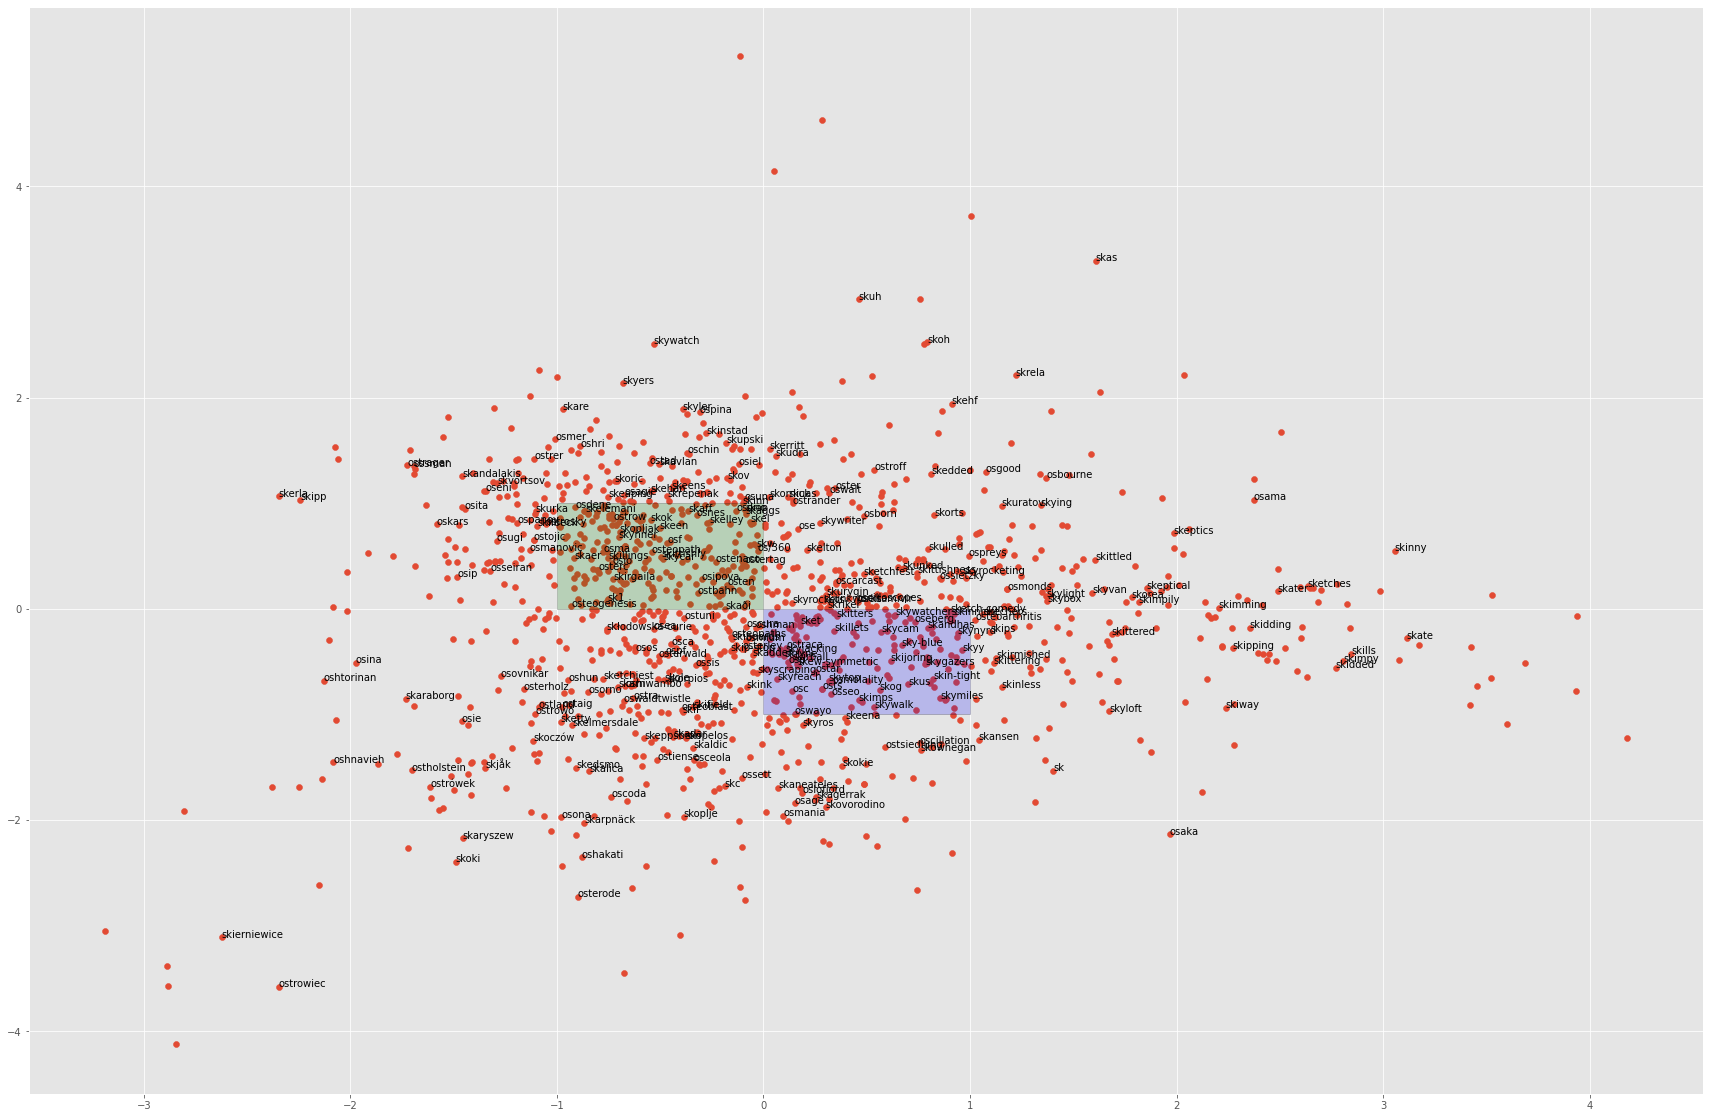

In [345]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
for i, w in enumerate(os_words):
    if i % 5 == 0:
        ax.annotate(w, (os_embs_2[i, 0], os_embs_2[i, 1]))
ax.scatter(os_embs_2[:,0], os_embs_2[:,1])
ax.add_patch(Rectangle((0, -1),1, 1, alpha=0.2, facecolor="blue", edgecolor="black", linewidth=1, linestyle='solid'))
ax.add_patch(Rectangle((-1, 0),1, 1, alpha=0.2, facecolor="green", edgecolor="black", linewidth=1, linestyle='solid'))

На графике выше можно увидеть, что особой кластеризации не происходит и все слова в основном собираются вокруг двух центров.<br>
Один центр в левой части синего прямоугольника и один в левой верхней части зеленого. Посмотрим их поближе.

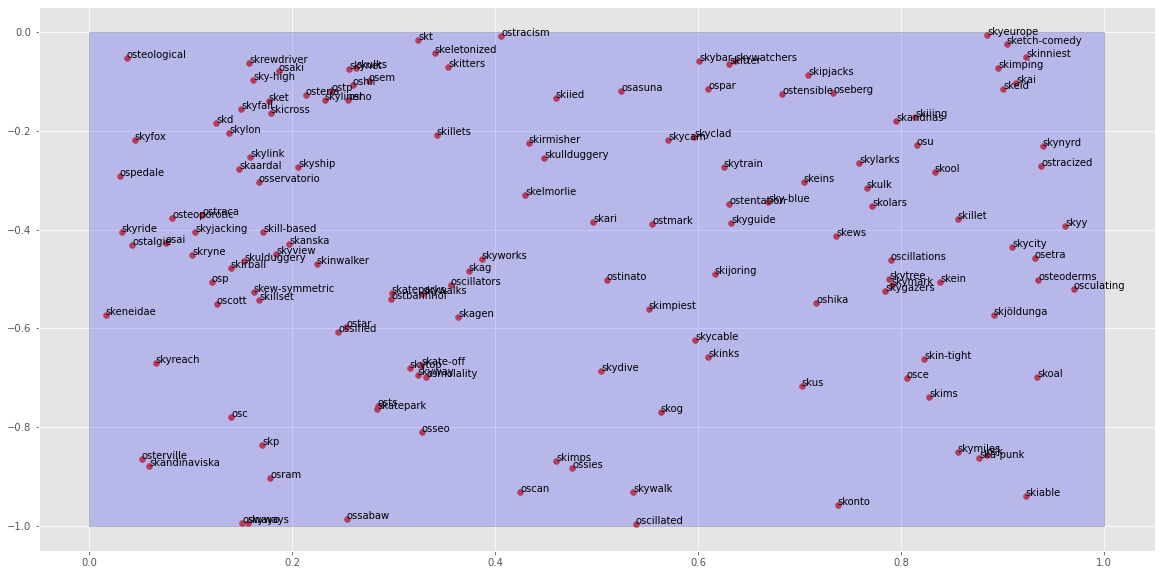

In [346]:
os_embs_close1 = np.array([os_embs_2[ind] for ind, word in enumerate(os_words) if (0 < os_embs_2[ind][0] < 1) and ((-1 < os_embs_2[ind][1] < 0))])
os_words_close1 = np.array([word for ind, word in enumerate(os_words) if (0 < os_embs_2[ind][0] < 1) and ((-1 < os_embs_2[ind][1] < 0))])

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
for i, w in enumerate(os_words_close1):
    if i % 1 == 0:
        ax.annotate(w, (os_embs_close1[i, 0], os_embs_close1[i, 1]))
ax.scatter(os_embs_close1[:,0], os_embs_close1[:,1])
ax.add_patch(Rectangle((0, -1),1, 1, alpha=0.2, facecolor="blue", edgecolor="black", linewidth=1, linestyle='solid'))

Тут можно увидеть, что в левом верхнем углу собрались слова содержащие "sky" и большинство из них даже имеют схожий смысл, связанный с небом.

In [347]:
os_embs_close_green = np.array([os_embs_2[ind] for ind, word in enumerate(os_words) if (-1 < os_embs_2[ind][0] < 0) and (0 < os_embs_2[ind][1] < 1)])
os_words_close_green = np.array([word for ind, word in enumerate(os_words) if (-1 < os_embs_2[ind][0] < 0) and (0 < os_embs_2[ind][1] < 1)])

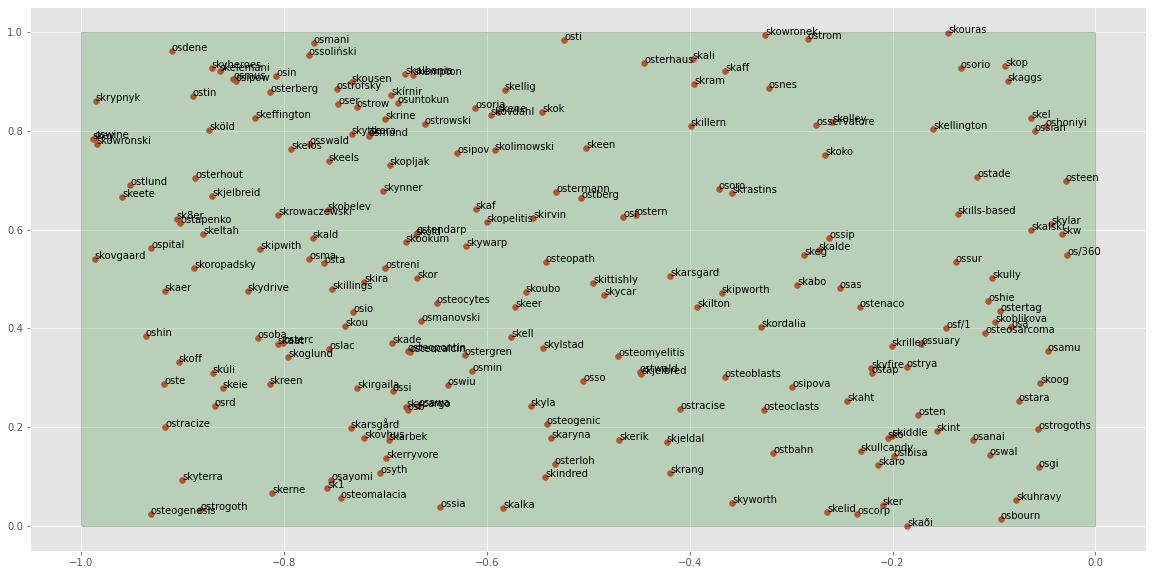

In [348]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
for i, w in enumerate(os_words_close_green):
    if i % 1 == 0:
        ax.annotate(w, (os_embs_close_green[i, 0], os_embs_close_green[i, 1]))
ax.scatter(os_embs_close_green[:,0], os_embs_close_green[:,1])
ax.add_patch(Rectangle((-1, 0),1, 1, alpha=0.2, facecolor="green", edgecolor="black", linewidth=1, linestyle='solid'))

В этом прямоугольнике сверху у нас центр для слов начинающихся на "os". Большинство из них мне не знакомы, но они похожи на какие-то фамилии, что тоже близко по смыслу.

### B. Напишите функцию предобработки и токенизации отзывов

В статье про glove embeddings можно прочитать, что при их обучении использовали Stanford Tokenizer. <br>
Который в свою очередь использовал TreeBank tokenizer, попробуем написать его более простую версию.
<br>


Посмотрев токены из матрицы, можно увидеть что к ним применён lowercase, части после апострофа выделяются в отдельное слово, дефисы внутри слов не отделяются пробелами. Также выделяются числа и знаки препинания.
И ещё много много правил. Постаремся сделать похоже, потому что при использовании предобученных эмбеддингов очень важно попадать в существующие токены.

In [3]:
def preprocessing(text):
    text = text.lower()
    
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'\*', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    text = text.replace("\\n", ' ')
    
    text = re.sub(r"([«“‘„']|[`]+)", r"\1 ", text)
    
    text = re.sub(r"([a-zA-Z])(\.)", r"\1 \2", text)
    text = re.sub(r"(\.)([a-zA-Z])", r"\1 \2", text)
    text = re.sub(r"([:,])([^\d])", r" \1 \2", text)
    text = re.sub(r"\.\.\.", r" ... ", text)
    text = re.sub(r"[;:@#$%&]", r" \g<0> ", text)
    text = re.sub(r'([^\.])(\.)([\]\)}>"\']*)\s*$', r"\1 \2\3 ", text)
    text = re.sub(r"[?!]", r" \g<0> ", text)
    text = re.sub(r"([^'])' ", r"\1 ' ", text)
    
    text = re.sub(r'(\S)(\))', r"\1 \2", text)
    text = re.sub(r'(\()(\S)', r"\1 \2", text)
    text = re.sub(r'(\))(\S)', r"\1 \2", text)
    text = re.sub(r'(\S)(\()', r"\1 \2", text)
    
    text = re.sub(r'(\S)(\")', r"\1 \2 ", text)
    text = re.sub(r'(\")(\S)', r"\1 \2", text)

    text = re.sub(r"([»”’]+)", r" \1", text)
    
    text = re.sub(r"([^' ])('[sS]|'[mM]|'[dD]|') ", r"\1 \2 ", text)
    text = re.sub(r"([^' ])('ll|'LL|'re|'RE|'ve|'VE|n't|N'T) ", r"\1 \2 ", text)
    
    return text

In [4]:
def tokenize_dataset(dataset, stem=0):
    """
        arg: list of texts
        return: list of tokenized texts
    """
    
    tokenized_dataset = [text.split() for text in dataset]
    if stem == 0:
        return [[token for token in text] for text in tokenized_dataset]
    stem_dataset = [[token[:stem] for token in text] for text in tokenized_dataset]
    return stem_dataset

In [5]:
train_texts_path = "./filimdb_evaluation/FILIMDB/train.texts"
train_labels_path = "./filimdb_evaluation/FILIMDB/train.labels"

with open(train_texts_path, 'r', encoding='utf-8',) as inp:
    train_texts = list(map(str.strip, inp.readlines()))
with open(train_labels_path, 'r', encoding='utf-8',) as inp:
    train_labels = list(map(str.strip, inp.readlines()))
    
    

proc_train = list(map(preprocessing, train_texts))
token_train = tokenize_dataset(proc_train)

In [6]:
print(token_train[2], sep="\n")

['after', 'watching', 'the', 'first', '20mn', 'of', 'blanche', '(', 'sorry', 'i', 'couldn', "'", 't', 'take', 'more', 'of', 'it', ')', ',', 'i', 'have', 'now', 'confirmed', 'she', 'does', 'not', '.', 'basically', ',', 'this', '"', 'movie', '"', 'is', 'an', 'insult', 'to', 'the', 'real', 'french', 'actors', 'participating', 'in', 'this', 'farcical', 'piece', 'of', 'junk', '.', 'it', 'starts', 'from', 'a', 'concept', 'successfully', 'used', 'in', 'french', 'comedies', '(', '"', 'deux', 'heures', 'moins', 'le', 'quart', 'avant', 'jesus', 'christ', '"', ',', '"', 'la', 'folie', 'des', 'grandeurs', '"', ',', '...', ')', ':', 'a', 'historical', 'movie', 'with', 'anachronic', 'tone', '/', 'dialogues', '.', 'this', 'can', 'give', 'brilliant', 'results', 'if', 'supported', 'by', 'brilliant', 'actors', 'and', 'a', '"', 'finesse', '"', 'of', 'direction', 'avoiding', 'the', 'dreaded', '"', 'heavy', 'comedy', '"', 'stigma', '.', 'unfortunately', ',', 'the', 'horsey-faced', 'lou', 'doillon', 'ruins'

### C. Напишите функцию векторизации отзыва.

In [7]:
def vectorize(tokenized_texts, word2emb, emb_mode=50, test_mode = False):
    res = []
    not_found = []
    for tok_text in tokenized_texts:
        text_vec = np.zeros(emb_mode)
        cnt = 0
        for token in tok_text:
            if token in word2emb:
                text_vec += word2emb[token]
                cnt += 1
            else:
                not_found.append(token)
        text_vec /= cnt
        res.append(text_vec)
    if test_mode:
        return np.stack(res), not_found
    return np.stack(res)

### D. Преобразуйте обучающую и тестовую выборки в матрицы размера $N∗d$

In [8]:
X_train, train_not_found = vectorize(token_train, word2emb, test_mode=True)

In [9]:
print(X_train.shape, len(train_not_found), len(set(train_not_found)))

(15000, 50) 34631 23967


In [10]:
test_texts_path = "./filimdb_evaluation/FILIMDB/test.texts"
test_labels_path = "./filimdb_evaluation/FILIMDB/test.labels"

with open(test_texts_path, 'r', encoding='utf-8',) as inp:
    test_texts = list(map(str.strip, inp.readlines()))
      
proc_test = list(map(preprocessing, test_texts))
token_test = tokenize_dataset(proc_test)
X_test, test_not_found = vectorize(token_test, word2emb, test_mode=True)
print(X_test.shape, len(test_not_found), len(set(test_not_found)))

(25000, 50) 54869 35647


### Вопрос D: какие токены из тренировочной и тестовой выборки не содержатся в таблице.

In [13]:
not_found = train_not_found + test_not_found
unique_not_found = list(set(not_found))
all_tokens = sum(len(text) for text in token_test) + sum(len(text) for text in token_train)
print(f"Not found {len(not_found)} tokens and {len(unique_not_found)} UNIQUE tokens. That's {len(not_found) / all_tokens * 100}% of all tokens.")
print(np.random.choice(unique_not_found, 20))

Not found 89500 tokens and 55746 UNIQUE tokens. That's 0.8290871565135912% of all tokens.
['no-the' 'super-excited' 'splatterfest' 'filmsin-your-face' 'achaar'
 'ma-who' 'boys-girls' 'enphasy' 'space/action/soft-core/titillation'
 'non-bondian' 'intercalates' 'novodny' 'akmed' 'much-appreciated'
 'art-gallery' 'vonnegut--an' 'narrative-like' 'right--she'
 'limited-action' 'hillybillyish']


### E. Опираясь на формулы из теоретической части задания, реализуйте прямой проход для нейронной сети с L-скрытыми слоями. 

In [11]:
def relu(z):
    tmp_z = np.array(z)
    tmp_z[tmp_z < 0] = 0
    return tmp_z

def relu_backw(z):
    tmp_z = np.array(z)
    tmp_z[tmp_z < 0] = 0
    tmp_z[tmp_z > 0] = 1
    return tmp_z

def tanh(z):
    return np.tanh(z)

def tanh_backw(z):
    return 1 - (tanh(z))**2

def sigmoid(z):
    np.clip(z, -100, 100)
    sig = 1 / (1 + np.exp(-z))
    sig = np.minimum(sig, 1.0 - np.finfo(np.float32).eps)
    sig = np.maximum(sig, 0.0 + np.finfo(np.float32).eps)
    return sig

def sigmoid_backw(z):
    return sigmoid(z) * (1 - sigmoid(z))

def linear(z):
    return z

def linear_backw(z):
    return np.ones(z.shape)

act_dict = {'relu': relu, 'tanh': tanh, 'sigmoid': sigmoid, 'linear': linear}
act_backw_dict = {'relu': relu_backw, 'tanh': tanh_backw, 'sigmoid': sigmoid_backw, 'linear': linear_backw}

In [113]:
def init_params(layer_sizes, activation):
    W = dict()
    for i in range(1, len(layer_sizes) - 1):
        h, w = layer_sizes[i - 1], layer_sizes[i]
        if activation == 'relu' or activation == 'linear':
            W[i] = np.random.randn(h + 1, w) * np.sqrt(2 / h)
        else:
            W[i] = np.random.randn(h + 1, w) * np.sqrt(1 / h)
    h, w = layer_sizes[-2], layer_sizes[-1]
    W[len(layer_sizes) - 1] = np.random.randn(h + 1, w) * np.sqrt(2 / h)
    return W

In [114]:
def fully_connected(a_prev, W, activation):
    a_inter = np.c_[np.ones((a_prev.shape[0])), a_prev]
    z_next = a_inter @ W
    a_next = act_dict[activation](z_next)
    cache = (a_prev, z_next, W)
    return a_next, cache

In [115]:
def ffnn(X, params, activation):
    caches = []
    layers_cnt = len(params)
    X_cur = np.array(X)
    for i in range(1, layers_cnt):
        X_cur, cache_cur = fully_connected(X_cur, params[i], activation)
        caches.append(cache_cur)
    ZL, cache_cur = fully_connected(X_cur, params[layers_cnt], 'linear')
    caches.append(cache_cur)
    return ZL, caches

In [116]:
def softmax_crossentropy(ZL, Y):
    ZL_tmp = np.array(ZL)
    maxes = ZL_tmp.max(axis=1, keepdims=True)
    ZL_tmp -= maxes
    divs = np.sum(np.exp(ZL_tmp), axis=1, keepdims=True)
    Y_hat = np.exp(ZL_tmp) / divs
    ce = -np.sum(Y*np.log(Y_hat))
    return ce / Y.shape[0], (Y_hat, Y)

# test1 = np.array([[0, 1], [0, 1], [1, 0]])
# test2 = np.array([[0, 1], [0, 1], [1, 0]])
# loss, ccccc = softmax_crossentropy(test1, test2)
# print(loss, ccccc)

### Вопрос E.1: 

Т.к. после случайной инициализации веса в матрицах удовлетворяют нормальному распределению с центром в точке 0 и некоторой дисперсией(зависит от метода инициализации), то при умножении входного вектора на матрицу весов матожидание получаемого вектора будет равно нулевому вектору.<br>
Тогда после софтмакса, матожидание получаемого вектора будет равно вектору $\{\frac{1}{m}, ..., \frac{1}{m} \}$, где $m$ - число нейронов в последнем слое.
<br>
Теперь исходя из матожидания выходного вектора посчитаем матожидание функции потерь.
<br>
$$L = -\frac{1}{n}\sum_{i=1}^{n}\sum_{j=1}^m y^{(i)}_j * log(\hat{y}^{(i)}_j) 
= -\frac{1}{n} * n * log(\frac{1}{m}) = log(m)
$$

In [117]:
def gen_Y(y_labels):
    res = []
    for lab in y_labels:
        res.append([0, 1] if lab == 'pos' else [1, 0])
    return np.array(res)
Y_train = gen_Y(train_labels)

In [118]:
weights = init_params([50, 100, 100, 2], 'tanh')
print(len(weights))
X_out, caches = ffnn(X_train, weights, 'tanh')
loss, cache = softmax_crossentropy(X_out, Y_train)

3


In [119]:
print(loss)

0.6930682083921539


Получили лосс, примерно похожий на $log(2) = 0.6931471805599453$, т.к. класса у нас 2 ($m = 2$)

### Вопрос E.2: : Постройте гистограммы, показывающие, как распределены компоненты входных векторов в зависимости от слоя нейросети, а также графики изменения среднего значения и дисперсии в зависимости от слоя.

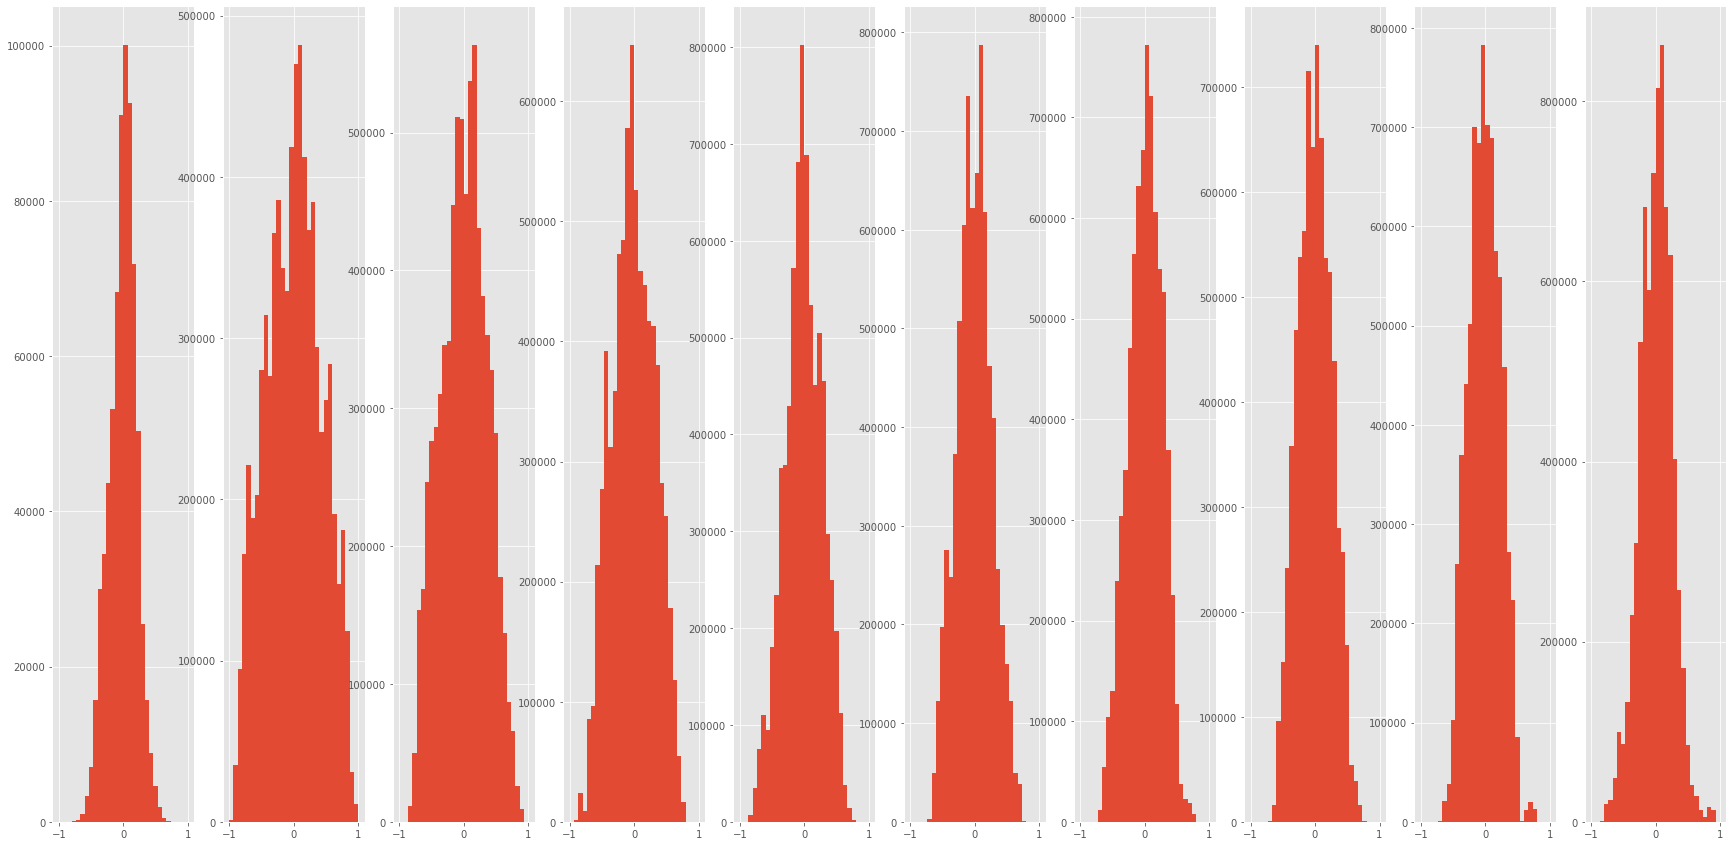

In [120]:
weights = init_params([50, 500, 500, 500, 500, 500, 500, 500, 500, 500,  2], 'tanh')
X_cur = np.array(X_train)

means = []
stds = []

means.append(X_cur.mean())
stds.append(X_cur.std())

plt.figure(figsize=(30, 15))
plt.subplot(1, len(weights), 1)
plt.hist(X_cur.ravel(), 30, range=(-1, 1))
for i in range(1, len(weights)):
    if i == len(weights) - 1:
        X_cur, cache_cur = fully_connected(X_cur, weights[i], 'linear')
    else:
        X_cur, cache_cur = fully_connected(X_cur, weights[i], 'tanh')
    plt.subplot(1, len(weights), i + 1)
    plt.hist(X_cur.ravel(), 30, range=(-1, 1))
    means.append(X_cur.mean())
    stds.append(X_cur.std())

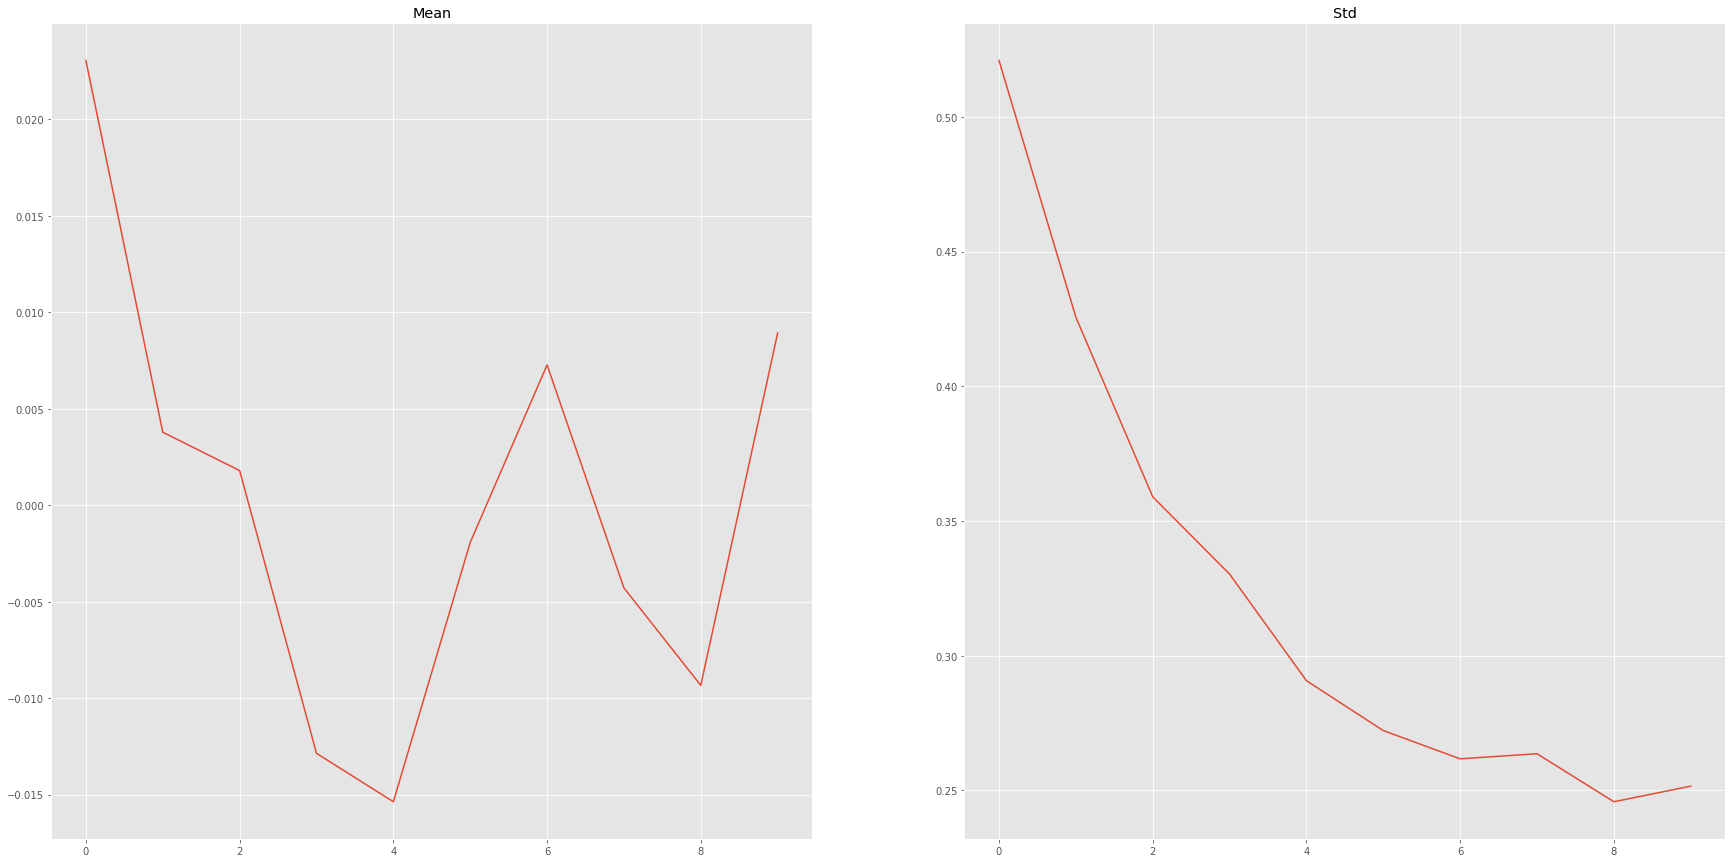

In [121]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.title.set_text('Mean')
ax1.plot(range(len(weights)), means)
ax2 = fig.add_subplot(122)
ax2.title.set_text('Std')
ax2.plot(range(len(weights)), stds)

В принципе всё работает как и ожидается от Xavier инициализации и tanh.<br>
Теперь попробуем уменьшить все веса в 100 раз.

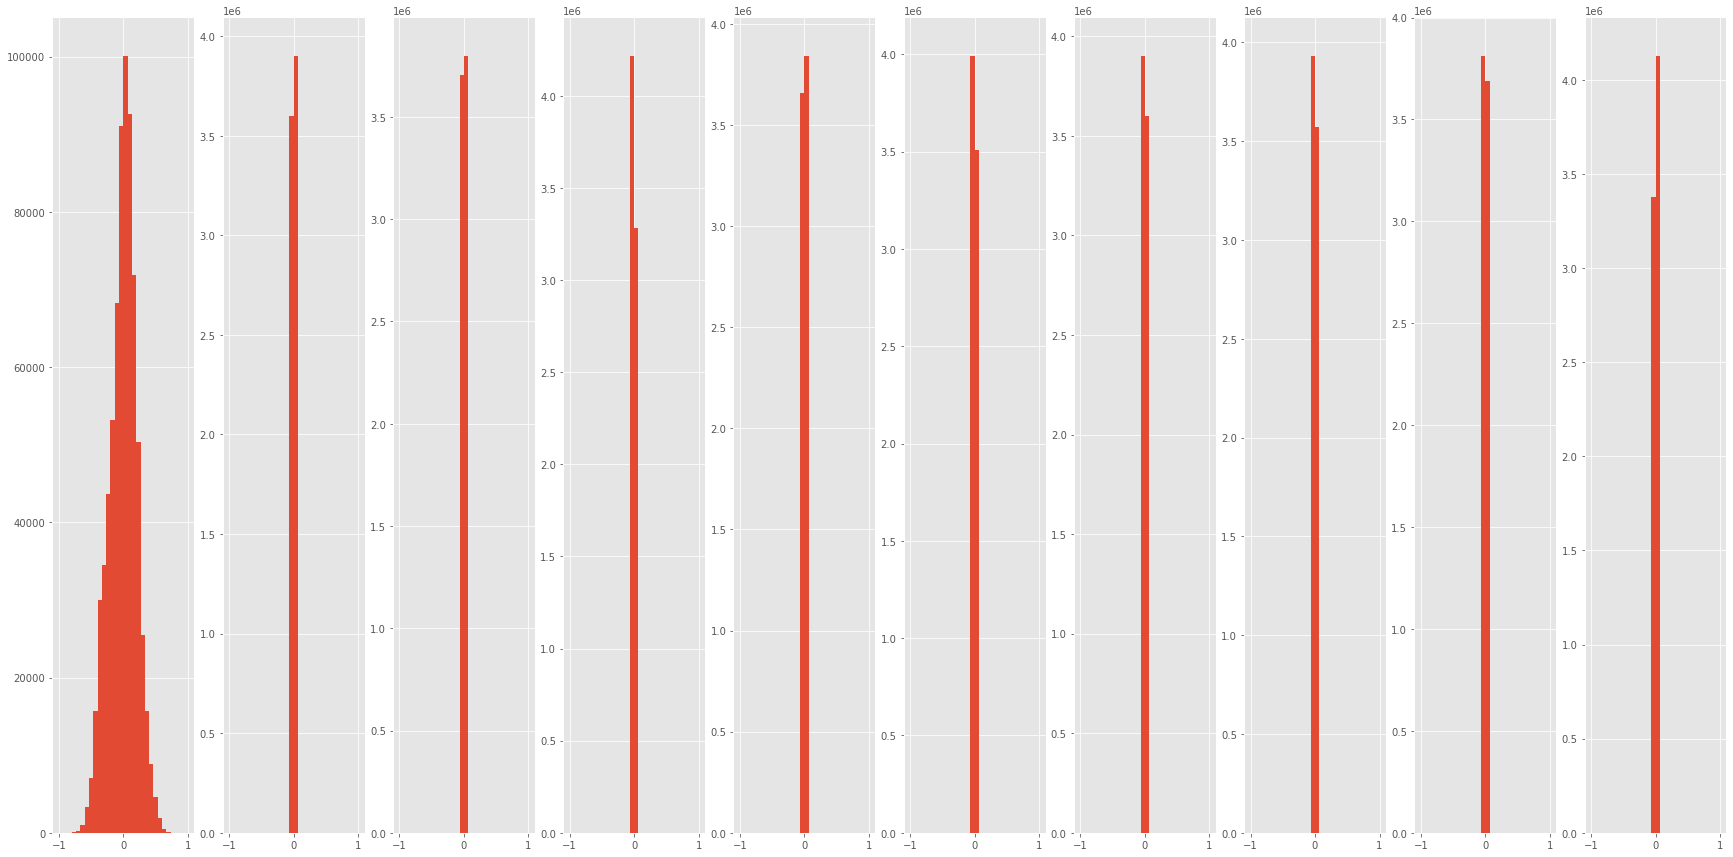

In [122]:
weights = init_params([50, 500, 500, 500, 500, 500, 500, 500, 500, 500,  2], 'tanh')
X_cur = np.array(X_train)
for i in range(1, len(weights) + 1):
    weights[i] *= 0.01
    
means = []
stds = []

means.append(X_cur.mean())
stds.append(X_cur.std())

plt.figure(figsize=(30, 15))
plt.subplot(1, len(weights), 1)
plt.hist(X_cur.ravel(), 30, range=(-1, 1))
for i in range(1, len(weights)):
    if i == len(weights) - 1:
        X_cur, cache_cur = fully_connected(X_cur, weights[i], 'linear')
    else:
        X_cur, cache_cur = fully_connected(X_cur, weights[i], 'tanh')
    plt.subplot(1, len(weights), i + 1)
    plt.hist(X_cur.ravel(), 30, range=(-1, 1))
    means.append(X_cur.mean())
    stds.append(X_cur.std())

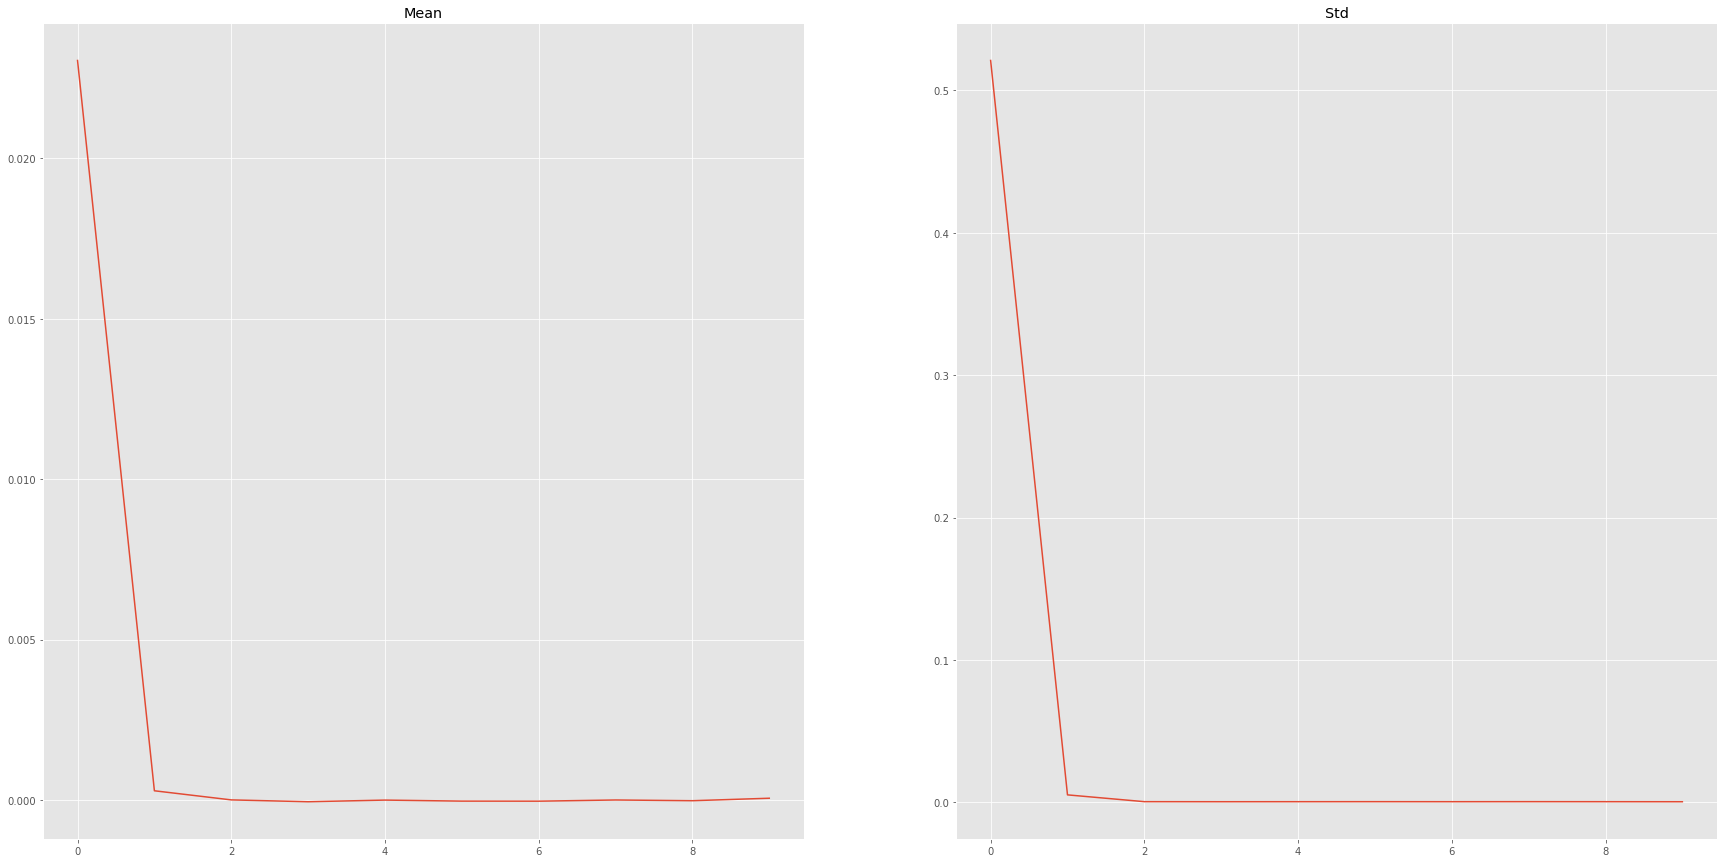

In [123]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.title.set_text('Mean')
ax1.plot(range(len(weights)), means)
ax2 = fig.add_subplot(122)
ax2.title.set_text('Std')
ax2.plot(range(len(weights)), stds)

Можно увидеть, что тут компоненты быстро затухли до 0, что не удивительно.<br>
Получается, что если инициализировать веса слишком маленькими, это будет усложнять протекание сигнала, как в прямом направлении, так и в обратном при распространении ошибки. Это сильно замедлит обучение сети.
Также из-за сильного уменьшения дисперсии до 0, нелинейность фукнции активации $tanh$ практически не будет заметна, что делает многослойность сети бесполезной.
<br>
<br>
Теперь пробуем увеличить веса в 100 раз.

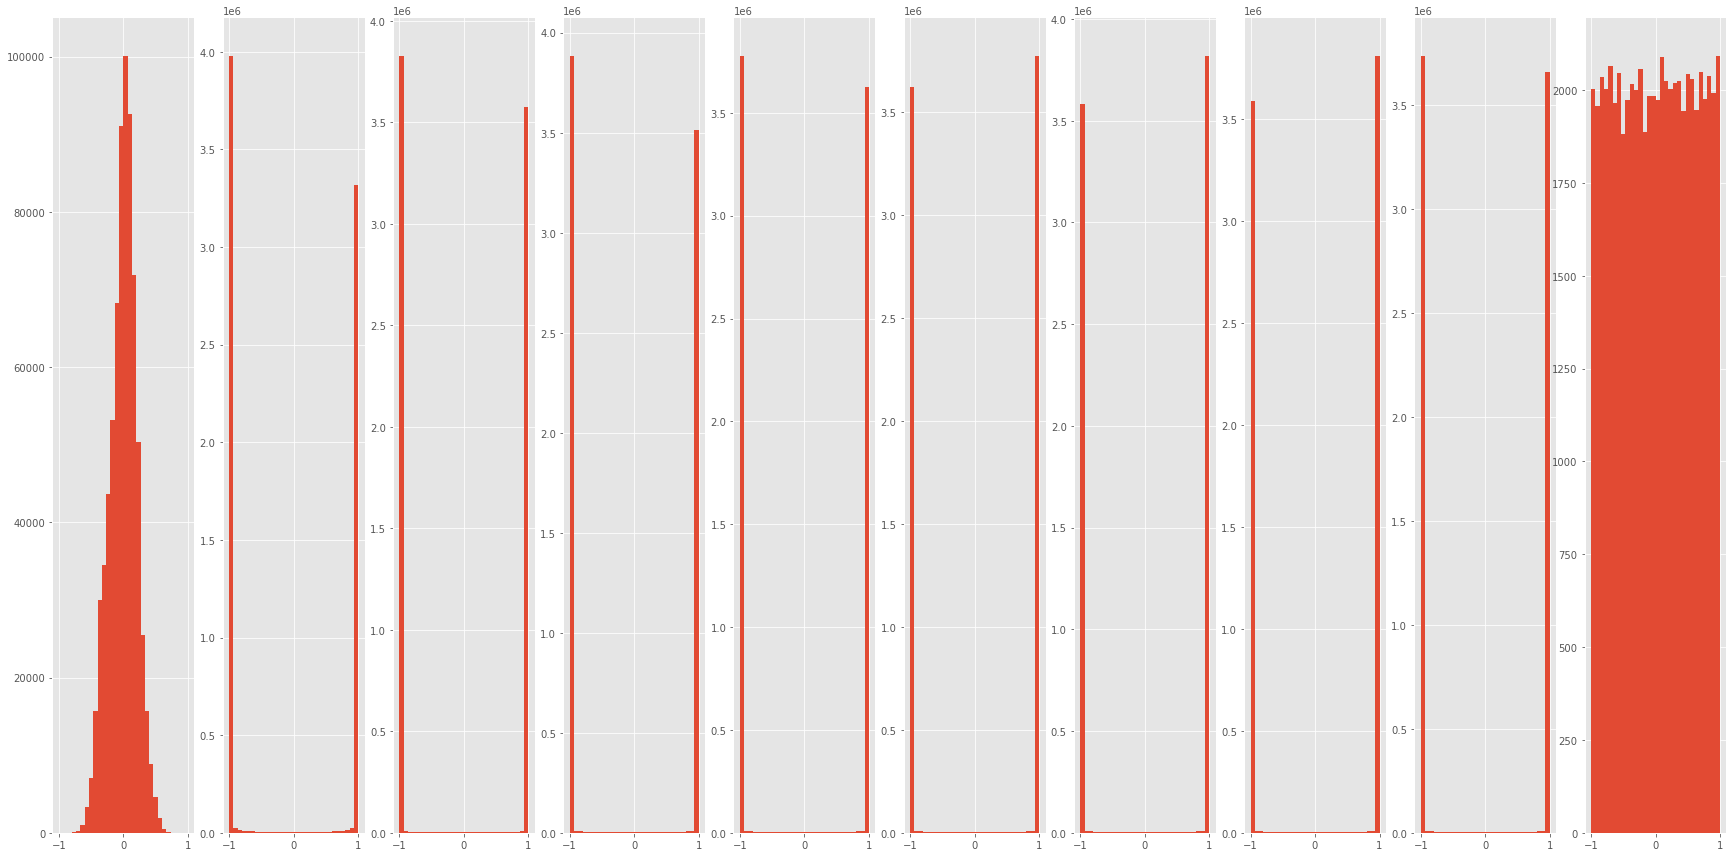

In [124]:
weights = init_params([50, 500, 500, 500, 500, 500, 500, 500, 500, 500,  2], 'tanh')
X_cur = np.array(X_train)
for i in range(1, len(weights) + 1):
    weights[i] *= 100
    
means = []
stds = []

means.append(X_cur.mean())
stds.append(X_cur.std())

plt.figure(figsize=(30, 15))
plt.subplot(1, len(weights), 1)
plt.hist(X_cur.ravel(), 30, range=(-1, 1))
for i in range(1, len(weights)):
    if i == len(weights) - 1:
        X_cur, cache_cur = fully_connected(X_cur, weights[i], 'linear')
    else:
        X_cur, cache_cur = fully_connected(X_cur, weights[i], 'tanh')
    plt.subplot(1, len(weights), i + 1)
    plt.hist(X_cur.ravel(), 30, range=(-1, 1))
    means.append(X_cur.mean())
    stds.append(X_cur.std())

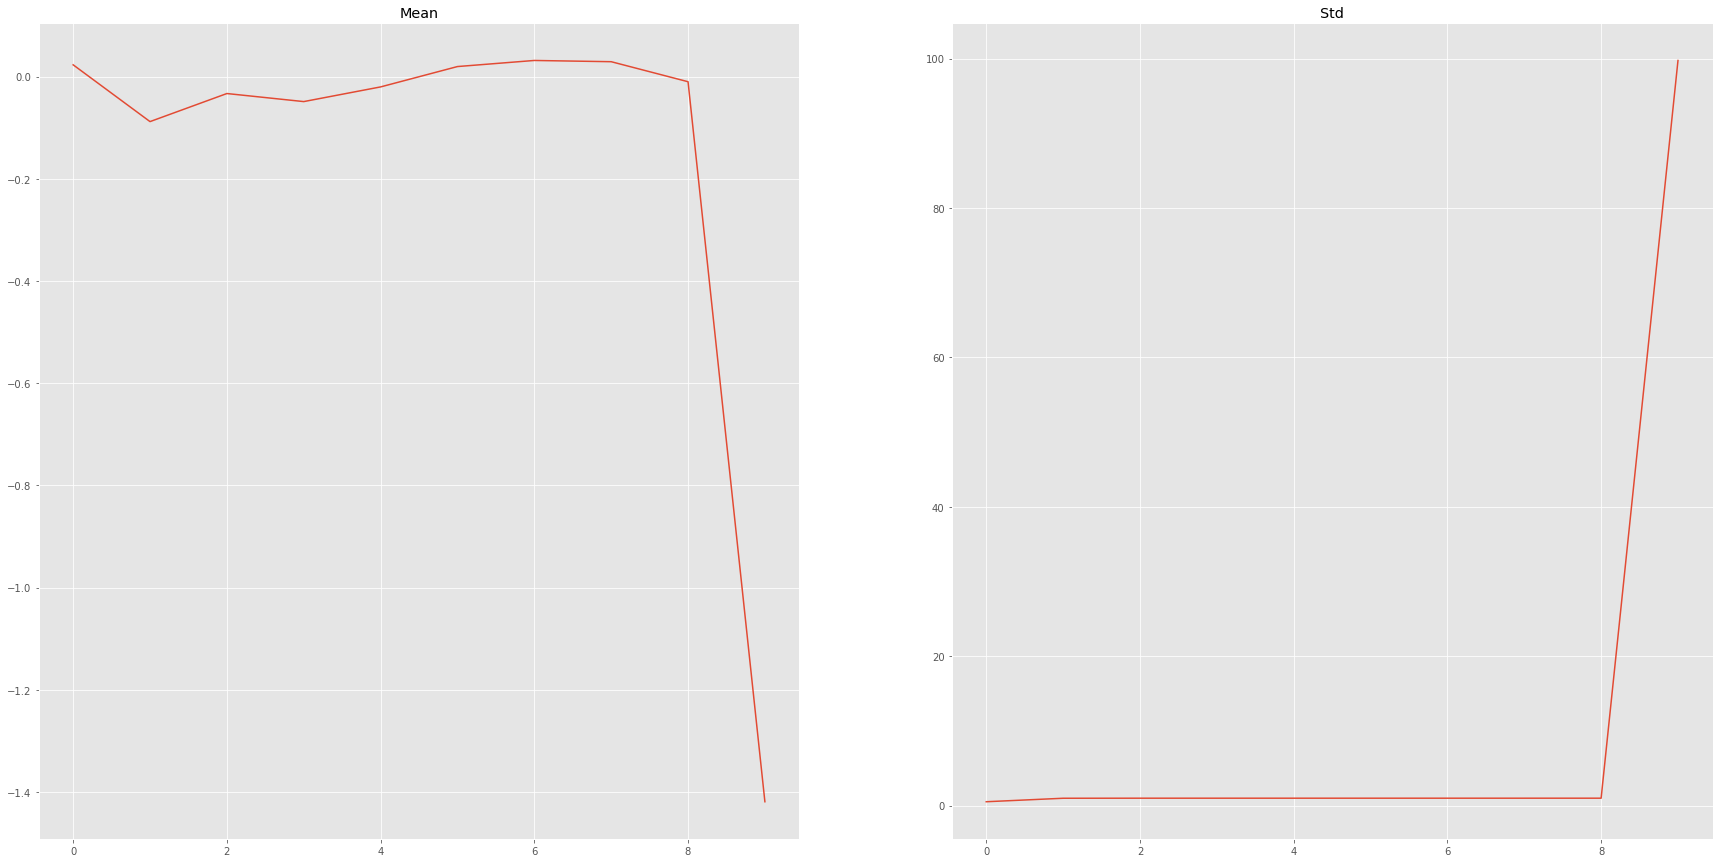

In [125]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.title.set_text('Mean')
ax1.plot(range(len(weights)), means)
ax2 = fig.add_subplot(122)
ax2.title.set_text('Std')
ax2.plot(range(len(weights)), stds)

Тут можно увидеть, что все компоненты стали равны либо $-1$, либо $1$ т.е. сильно увеличились по модулю. <br>Последнее распределение такое, потому что там линейная активация.
<br>
Если же инициализировать веса сети большими числами, компоненты будут становиться равными -1 и 1 и занулять градиенты при обратном распространении ошибки, что также замедляет обучение сети.
<br>

### F. Опираясь на формулы из теоретической части задания, реализуйте обратный проход


In [126]:
def fully_connected_backward(dA, cache, activation):
    A_prev, Z_cur, W_cur = cache
    n = dA.shape[0]
    dZ = dA * act_backw_dict[activation](Z_cur)
    dW = (A_prev.T @ dZ)
    db =  np.sum(dZ, axis=0, keepdims=True)
    dW = np.r_[db, dW]
    dA_prev = dZ @ (W_cur[1:, :]).T
    return dA_prev, dW 

In [127]:
def ffnn_backward(dZL, caches, activation):
    cur_layer = len(caches)
    W_grads = dict()
    A_prev, Z_cur, W_cur = caches[cur_layer - 1]
    n = dZL.shape[0]
    dWL = (A_prev.T @ dZL)
    dbL = np.sum(dZL, axis=0, keepdims=True)
    dWL = np.r_[dbL, dWL]
    W_grads[cur_layer] = dWL
    dA_prev = dZL @ (W_cur[1:,:]).T
    for i in range(cur_layer - 2, -1, -1):
        dA_prev, dW = fully_connected_backward(dA_prev, caches[i], activation)
        W_grads[i + 1] = dW
        
    return W_grads

In [128]:
def softmax_crossentropy_backward(cache):
    return (1/cache[0].shape[0]) * (cache[0] - cache[1])

### Вопрос G: Проведите gradient checking на каждом слое нейронной сети

Gradient cheking заключается в том, чтобы для каждой матрицы весов посчитать просто градиент и численный градиент для каждого элемента каждой матрицы весов.
<br>

И потом посмотреть, насколько они отличаются.

Для проверки возьмём не всю тренировочную выборку, а $1000$ элементов из неё.

In [129]:
from copy import deepcopy
np.random.seed(434343)
random.seed(434343)

Y_train = gen_Y(train_labels)

In [130]:
weights = init_params([50, 100, 100, 2], 'tanh')
for w in weights.values():
    print(w.shape)
X_cur = np.array(X_train[:1000])
Y_cur = np.array(Y_train[:1000])

### Посчитаем сначала просто градиенты

X_out, caches = ffnn(X_cur, weights, 'tanh')
loss, last_cache = softmax_crossentropy(X_out, Y_cur)
dZL = softmax_crossentropy_backward(last_cache)
W_grads = ffnn_backward(dZL, caches, 'tanh')
for ind, gr in W_grads.items():
    print(ind, gr)

(51, 100)
(101, 100)
(101, 2)
3 [[ 0.22138512 -0.22138512]
 [-0.08842739  0.08842739]
 [ 0.05727274 -0.05727274]
 [ 0.1774785  -0.1774785 ]
 [ 0.01831253 -0.01831253]
 [ 0.04064555 -0.04064555]
 [ 0.12641976 -0.12641976]
 [ 0.03374468 -0.03374468]
 [-0.04592098  0.04592098]
 [ 0.16042062 -0.16042062]
 [-0.04138317  0.04138317]
 [ 0.10911688 -0.10911688]
 [-0.14342917  0.14342917]
 [-0.02438504  0.02438504]
 [-0.11542474  0.11542474]
 [ 0.08251828 -0.08251828]
 [-0.06050268  0.06050268]
 [ 0.17537322 -0.17537322]
 [-0.06850439  0.06850439]
 [ 0.07345012 -0.07345012]
 [-0.07192833  0.07192833]
 [ 0.03020819 -0.03020819]
 [-0.01209071  0.01209071]
 [-0.09674559  0.09674559]
 [ 0.11186443 -0.11186443]
 [-0.03943856  0.03943856]
 [-0.02400611  0.02400611]
 [ 0.01544712 -0.01544712]
 [ 0.0354544  -0.0354544 ]
 [-0.10976961  0.10976961]
 [ 0.1318085  -0.1318085 ]
 [-0.03372705  0.03372705]
 [ 0.05623181 -0.05623181]
 [ 0.13192773 -0.13192773]
 [-0.12685995  0.12685995]
 [-0.03760564  0.037605

In [134]:
### Теперь посчитаем градиенты численно
eps = 1e-4
max_error = 0
W_grads_numeric = dict()
for layer in tqdm(range(1, len(weights) + 1)):
    weights_1 = deepcopy(weights)
    weights_2 = deepcopy(weights)
    grad = np.zeros(weights_1[layer].shape)
    for i in range(weights_1[layer].shape[0]):
        for j in range(weights_1[layer].shape[1]):
            
            weights_1[layer][i, j] += eps
            weights_2[layer][i, j] -= eps
            X_out, caches = ffnn(X_cur, weights_1, 'tanh')
            loss_plus, last_cache = softmax_crossentropy(X_out, Y_cur)
            X_out, caches = ffnn(X_cur, weights_2, 'tanh')
            loss_minus, last_cache = softmax_crossentropy(X_out, Y_cur)
            weights_1[layer][i, j] -= eps
            weights_2[layer][i, j] += eps
            grad[i, j] = (loss_plus - loss_minus) / (2 * eps)
            error = np.abs(grad[i, j] - W_grads[layer][i, j]) / max(np.abs(grad[i, j]), np.abs(W_grads[layer][i, j]))
            max_error = max(max_error, error)
            if error > 1e-6:
                print(layer, grad)
                print(f"Layer:{layer}, (i, j):({i}, {j}), error = {error}")                
                raise RuntimeError
    
    W_grads_numeric[layer] = grad

 33%|████████████████████████████                                                        | 1/3 [00:37<01:14, 37.23s/it]

2 [[-0.02656887  0.04227039 -0.00808401 ... -0.0622042  -0.05336989
  -0.00655052]
 [ 0.01773861 -0.02816915  0.00535558 ...  0.04142932  0.03538852
   0.00435884]
 [ 0.00433343 -0.00699255  0.00136395 ...  0.01032255  0.00897952
   0.00109407]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Layer:2, (i, j):(30, 4), error = 2.482927227180462e-06


RuntimeError: 

In [ ]:
print(max_error)

Ошибок не обнаружено, значит градиенты считаются правильно. 👍 

### H. Реализуйте функции обучения сети:

In [ ]:
def sgd_step(params, grads, learning_rate):
    for i in range(1, len(params) + 1):
        params[i] = params[i] - learning_rate * grads[i]

In [ ]:
def batch_generator(X, y, shuffle=True, batch_sz=1000):
    """
    Генератор новых батчей для обучения
    """
    X_all = X
    y_all = y
    indices = np.arange(X_all.shape[0])
    if shuffle:
        np.random.shuffle(indices)
    for i in range(0, X_all.shape[0], batch_sz):
        if len(indices[i: i + batch_sz]) != batch_sz:
            break
        X_batch = X_all[indices[i: i + batch_sz]]
        y_batch = y_all[indices[i: i + batch_sz]]
        yield (X_batch, y_batch)

In [ ]:
def accuracy(Y_true, Y_hat):
    Y_pred_lab = np.argmax(Y_hat,  axis=1)
    Y_true_lab = np.argmax(Y_true,  axis=1)
#     print(Y_pred_lab.shape, Y_true_lab.shape)
    return (Y_true_lab == Y_pred_lab).mean()

In [ ]:
def train_ffnn(X_train, Y_train, X_dev, Y_dev, layer_sizes, lr, num_epochs, batch_size):
    activ = 'tanh'
    W = init_params(layer_sizes, activ)
    
    losses_ep = {'train':[], 'dev': []}
    acc_ep = {'train':[], 'dev': []}

    ZL_train, caches_train = ffnn(X_train, W, activ)
    loss_train, lc_train = softmax_crossentropy(ZL_train, Y_train)
    print("LAST CACHE:", lc_train[0].shape, lc_train[1].shape)
    print("LAST CACHE:", lc_train[0][:20], lc_train[1][:20])
    acc_train = accuracy(*lc_train)
    losses_ep['train'].append(loss_train)
    acc_ep['train'].append(acc_train)
    
    for ep in tqdm(range(num_epochs)):
        new_epoch_generator = batch_generator(X_train, Y_train, batch_sz = batch_size, shuffle=True)
        for ind, (X_batch, Y_batch) in enumerate(new_epoch_generator):
            ZL, caches = ffnn(X_batch, W, activ)
            loss, last_cache = softmax_crossentropy(ZL, Y_batch)
            dZL = softmax_crossentropy_backward(last_cache)
            W_grads = ffnn_backward(dZL, caches, activ)
            sgd_step(W, W_grads, lr)
        # Считаем лосс и точность на трейне и валидации.
        ZL_train, caches_train = ffnn(X_train, W, activ)
        loss_train, lc_train = softmax_crossentropy(ZL_train, Y_train)
#         print("LAST CACHE:", lc_train[0].shape, lc_train[1].shape)
        acc_train = accuracy(*lc_train)
        losses_ep['train'].append(loss_train)
        acc_ep['train'].append(acc_train)
        
        ZL_dev, caches_dev = ffnn(X_dev, W, activ)
        loss_dev, lc_dev = softmax_crossentropy(ZL_dev, Y_dev)
        acc_dev = accuracy(*lc_dev)
        losses_ep['dev'].append(loss_dev)
        acc_ep['dev'].append(acc_dev)
        
    return W, losses_ep, acc_ep

### I. Для проверки работоспособности...
Т.к. BOW-вектора расчехлять не хочется, то давайте попробуем переобучить сеть на небольшом батче.

In [ ]:
dev_texts_path = "./filimdb_evaluation/FILIMDB/dev.texts"
dev_labels_path = "./filimdb_evaluation/FILIMDB/dev.labels"

with open(dev_texts_path, 'r', encoding='utf-8',) as inp:
    dev_texts = list(map(str.strip, inp.readlines()))
with open(dev_labels_path, 'r', encoding='utf-8',) as inp:
    dev_labels = list(map(str.strip, inp.readlines()))
      
proc_dev = list(map(preprocessing, dev_texts))
token_dev = tokenize_dataset(proc_dev)
X_dev = vectorize(token_dev, word2emb)
Y_dev = gen_Y(dev_labels)
print(X_dev.shape, Y_dev.shape)


In [ ]:
def show_info(losses, acc):
    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax1.plot(losses['train'])
    ax2 = fig.add_subplot(222)
    ax2.plot(acc['train'])
    ax3 = fig.add_subplot(223)
    ax3.plot(losses['dev'])
    ax4 = fig.add_subplot(224)
    ax4.plot(acc['dev'])
    plt.show()

In [ ]:
X_small_tr, Y_small_tr = X_train[:100], Y_train[:100]
X_small_dev, Y_small_dev = X_dev[:100], Y_dev[:100]

print(X_small_tr[:10])
network_struct = [50, 100, 100, 2]
W, losses, acc = train_ffnn(X_small_tr, Y_small_tr, X_small_dev, Y_small_dev, network_struct, lr=0.01, num_epochs=2000, batch_size=1000)

In [ ]:
# print(losses['train'], acc['train'])
show_info(losses, acc)